In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

iowa_file_path = '../train.csv'

home_data = pd.read_csv(iowa_file_path)

y = home_data.SalePrice

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Normal model
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)

val_predictions = iowa_model.predict(val_X)
val_mae_non_specific = mean_absolute_error(val_predictions, val_y)
print(f"Validation MAE when not specifying max_leaf_nodes: {val_mae_non_specific}")

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)

val_predictions = iowa_model.predict(val_X)
val_mae_leaf_specific = mean_absolute_error(val_predictions, val_y)
print(f"Validation MAE for best value of max_leaf_nodes: {val_mae_leaf_specific}")

Validation MAE when not specifying max_leaf_nodes: 29652.931506849316
Validation MAE for best value of max_leaf_nodes: 27282.50803885739


# Exercises

## Use a Random Forest

In [3]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X,train_y)

rf_val_mae = mean_absolute_error(val_y,rf_model.predict(val_X))
print(f"Validation MAE for Random Forest Model: {rf_val_mae}")

Validation MAE for Random Forest Model: 21857.15912981083


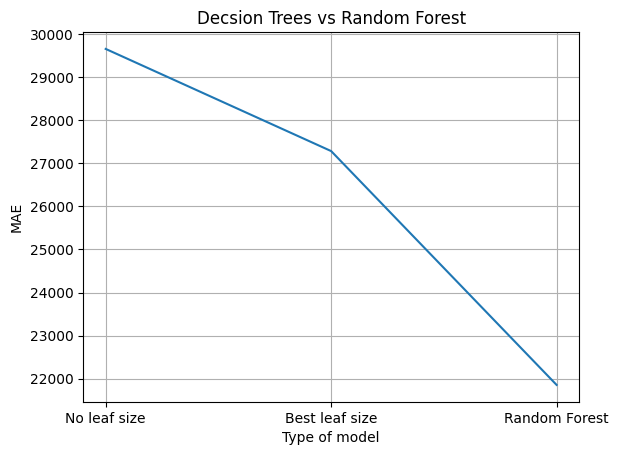

In [4]:
import matplotlib.pyplot as plt
plt.plot(["No leaf size","Best leaf size","Random Forest"],[val_mae_non_specific,val_mae_leaf_specific,rf_val_mae])
plt.title("Decsion Trees vs Random Forest")
plt.xlabel("Type of model")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

Error reduction is seen when random forest is used